In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import  copy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from datetime import datetime, timezone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
file_path = "./dataset/Data.csv"
df = pd.read_csv(file_path)

In [7]:
df.shape

(112516, 5)

In [8]:
df.describe()

,Participant,HR,respr,Time(sec),Label
count,112516.000000,112472.000000,112516.000000,1.125160e+05,112516.000000
mean,18.475470,80.216177,12.465482,1.645692e+09,0.327198
std,9.871133,12.732206,2.030810,8.179419e+05,0.469192
min,2.000000,49.000000,5.204728,1.644228e+09,0.000000
25%,10.000000,71.330000,11.191843,1.644846e+09,0.000000
50%,18.000000,77.890000,12.743635,1.645461e+09,0.000000
75%,27.000000,87.020000,13.877519,1.646648e+09,1.000000
max,35.000000,146.780000,18.163532,1.646842e+09,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112472 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


In [10]:
df.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [11]:
class_distribution = df['Label'].value_counts()
print(class_distribution)

Label
0    75701
1    36815
Name: count, dtype: int64


In [ ]:
df['HR'].fillna(df['HR'].mean(), inplace=True)

In [13]:
df.isnull().sum()

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

In [14]:
df.describe()

,Participant,HR,respr,Time(sec),Label
count,112516.000000,112516.000000,112516.000000,1.125160e+05,112516.000000
mean,18.475470,80.216177,12.465482,1.645692e+09,0.327198
std,9.871133,12.729716,2.030810,8.179419e+05,0.469192
min,2.000000,49.000000,5.204728,1.644228e+09,0.000000
25%,10.000000,71.330000,11.191843,1.644846e+09,0.000000
50%,18.000000,77.900000,12.743635,1.645461e+09,0.000000
75%,27.000000,87.020000,13.877519,1.646648e+09,1.000000
max,35.000000,146.780000,18.163532,1.646842e+09,1.000000


In [15]:
df_norm = copy.deepcopy(df)

In [16]:
train_data,test_data= train_test_split(df, test_size=0.02, random_state=42)

In [17]:
train_data.value_counts()

Participant  HR      respr      Time(sec)   Label
2            58.22   15.063808  1644231091  0        1
24           73.57   14.517080  1646061654  0        1
                     12.515570  1646059540  0        1
                     12.510317  1646059541  0        1
             73.55   15.118393  1646060170  1        1
                                                    ..
13           69.07   14.221354  1645445519  0        1
                     14.208554  1645445520  0        1
                     13.979188  1645445499  0        1
             69.05   14.933047  1645445705  0        1
35           116.23  10.186199  1646840699  0        1
Name: count, Length: 110265, dtype: int64

In [18]:
test_data.value_counts()

Participant  HR      respr      Time(sec)   Label
2            58.23   15.115008  1644231092  0        1
24           70.35   13.443256  1646060629  1        1
             69.33   13.592343  1646060574  1        1
             69.38   14.260518  1646059273  0        1
             69.40   14.587400  1646060318  0        1
                                                    ..
13           66.78   14.974098  1645445722  0        1
             66.75   17.617993  1645442834  0        1
             66.55   13.195008  1645445416  0        1
             66.45   13.188027  1645445410  0        1
35           106.37  10.331690  1646840676  0        1
Name: count, Length: 2251, dtype: int64

In [19]:
feature_lst =['HR','respr','Time(sec)']
target = ["Label"]
target_names = ['not stressed', 'stressed']

In [20]:
X_train, y_train, X_test, y_test = train_data[feature_lst], train_data[target], test_data[feature_lst], test_data[target]

### Without applying normalization
* initiate decision tree algo
* train decisiontree classifier
* predict the data for test data set

In [21]:

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_dt_pred = dt.predict(X_test)

In [22]:
y_pred_train_dt = dt.predict(X_train)

In [23]:
clf_dt = classification_report(y_test, y_dt_pred,target_names=target_names)
print("DecisionTree Classification Report: ")
print("",clf_dt)

DecisionTree Classification Report: 
               precision    recall  f1-score   support

not stressed       0.99      0.99      0.99      1516
    stressed       0.98      0.97      0.97       735

    accuracy                           0.98      2251
   macro avg       0.98      0.98      0.98      2251
weighted avg       0.98      0.98      0.98      2251



### Classification report for DecisionTree: Train Data
Evaluate accuracy, precision, recall, and F1-score

In [24]:
clf_train_dt = classification_report(y_train, y_pred_train_dt,target_names=target_names)
print("DecisionTree Train Data Classification Report: ")
print("",clf_train_dt)

DecisionTree Train Data Classification Report: 
               precision    recall  f1-score   support

not stressed       1.00      1.00      1.00     74185
    stressed       1.00      1.00      1.00     36080

    accuracy                           1.00    110265
   macro avg       1.00      1.00      1.00    110265
weighted avg       1.00      1.00      1.00    110265



### Confusion Matrix(DecisionTree)
1=Positive (stressed)
0=Negative (not stressed)

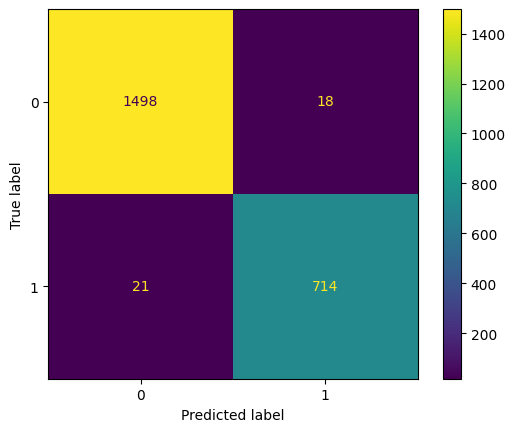

In [25]:
cnf_matrix_dt= confusion_matrix(y_test,y_dt_pred)
cm_display_dt = ConfusionMatrixDisplay(cnf_matrix_dt).plot()
print(cm_display_dt)

### Random Forest
Train and predict the model on test data set

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

/Users/kalpanasahu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Classification Report for Random Forest on test data

In [27]:
clf_rf = classification_report(y_test,y_rf_pred,target_names = target_names)
print("Random Forest Test data Classification Report: ")
print(clf_rf)

Random Forest Test data Classification Report: 
              precision    recall  f1-score   support

not stressed       0.98      0.99      0.99      1516
    stressed       0.98      0.97      0.97       735

    accuracy                           0.98      2251
   macro avg       0.98      0.98      0.98      2251
weighted avg       0.98      0.98      0.98      2251



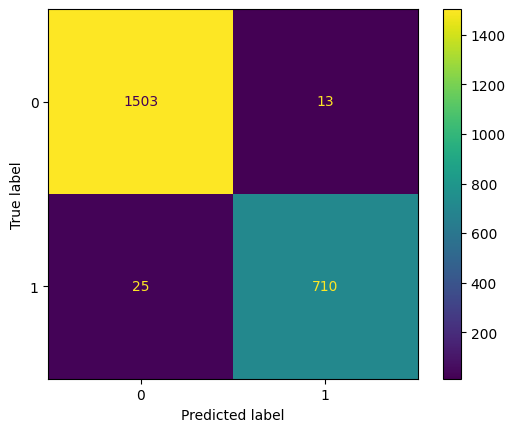

In [28]:
cnf_matrix_rf= confusion_matrix(y_test,y_rf_pred)
cm_display_rf = ConfusionMatrixDisplay(cnf_matrix_rf).plot()
print(cm_display_rf)

### LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr= lr.predict(X_train)

/Users/kalpanasahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####  Classification Report

In [30]:
clf_lr = classification_report(y_test,y_pred_lr,target_names= target_names)
print("Logistic RegressionClassification Report: ")
print(clf_lr)

Logistic RegressionClassification Report: 
              precision    recall  f1-score   support

not stressed       0.67      1.00      0.80      1516
    stressed       0.00      0.00      0.00       735

    accuracy                           0.67      2251
   macro avg       0.34      0.50      0.40      2251
weighted avg       0.45      0.67      0.54      2251



/Users/kalpanasahu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kalpanasahu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kalpanasahu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### Normalization

In [34]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112516 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


In [32]:
data_train_norm,data_test_norm= train_test_split(df_norm, test_size=0.02, random_state=42)
X_train_norm, y_train_norm, X_test_norm, y_test_norm = data_train_norm[["HR", "respr",'Time(sec)']], data_train_norm["Label"], data_test_norm[["HR", "respr",'Time(sec)']], data_test_norm["Label"]

In [35]:
norm = MinMaxScaler().fit(X_train_norm)
X_train_norm_sc = norm.transform(X_train_norm)
X_test_norm_sc = norm.transform(X_test_norm)

lr_norm = LogisticRegression()
lr_norm.fit(X_train_norm_sc,y_train_norm)
y_pred_lr_norm = lr_norm.predict(X_test_norm_sc)

In [36]:
y_pred_norm_train_lr = lr_norm.predict(X_train_norm_sc)

### Classification Report:Logistic Regression with normalization

In [37]:
clf_lr = classification_report(y_test_norm,y_pred_lr_norm,target_names= target_names)
print("Logistic Regression Normalization on test data: ")
print(clf_lr)

Logistic Regression Normalization on test data: 
              precision    recall  f1-score   support

not stressed       0.68      0.99      0.80      1516
    stressed       0.60      0.04      0.08       735

    accuracy                           0.68      2251
   macro avg       0.64      0.51      0.44      2251
weighted avg       0.65      0.68      0.57      2251



Logistic Regression


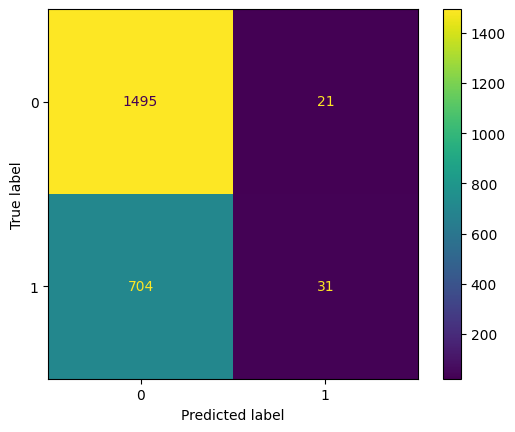

In [38]:
cnf_lr_norm= confusion_matrix(y_test_norm,y_pred_lr_norm)
cm_display_norm= ConfusionMatrixDisplay(cnf_lr_norm).plot()
print("Logistic Regression")
print(cm_display_norm)

#### Bar graph for Logistic Regression

Logistic Regression


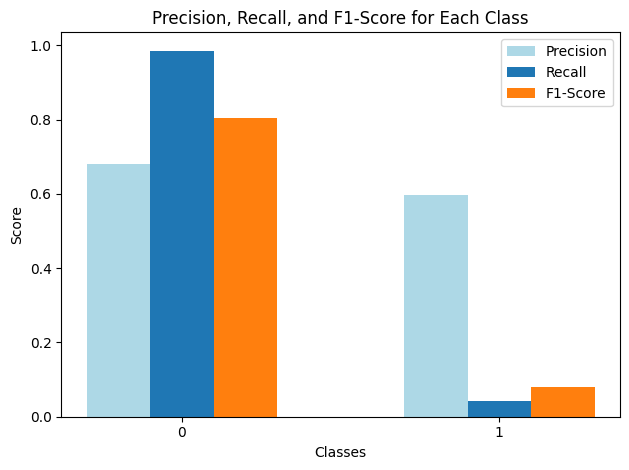

In [39]:
classes = np.unique(np.concatenate((y_test_norm, y_pred_lr_norm)))
report = classification_report(y_test_norm, y_pred_lr_norm, target_names=[str(c) for c in classes], output_dict=True)
precision = [report[str(c)]['precision'] for c in classes]
recall = [report[str(c)]['recall'] for c in classes]
f1_score = [report[str(c)]['f1-score'] for c in classes]

plt.subplot(1, 1, 1)
bar_width = 0.2
index = np.arange(len(classes))
precision_color = '#ADD8E6'
recall_color = '#ffffe0'
f1_score_color = '#ffcccb'
plt.bar(index, precision, bar_width, label='Precision',color = precision_color)
plt.bar(index + bar_width, recall, bar_width, label='Recall')
plt.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xticks(index + bar_width, classes)
plt.legend()

plt.tight_layout()
print("Logistic Regression")
plt.show()